# Preprocessing the Raw Data before the Power BI Dashboard

In [166]:
import zipfile
import pandas as pd
import numpy as np
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

zip_path = "raw_data_logistics_dashboard_v2.zip"
csv_name = "raw_data_logistics_dashboard.csv"   # filename *inside* the zip

with zipfile.ZipFile(zip_path, 'r') as z:
    df = pd.read_csv(z.open(csv_name))

df.head()

,fulfillment_shipment_id,shipments,packages,order_id,carrier,warehouse_type,network_type,origin_node,dest_postal_code,country,...,volume_type,number_of_reschedules,scan_X07,scan_X41,scan_X42,number_of_contacts,contact_cs_bucket,concession_bucket_l1,c2d,c2p
0,2.340430e+14,1,1,5345925-7907522,SEMRE,IN,In network,XDTM3-A,79801,DE,...,HB,0.0,N,N,N,NaN,NaN,"Not Delivered, Undeliverable",NaN,NaN
1,2.340440e+14,1,2,2964220-9656349,IAK,DF,Out of network,XEKWJ-A,83527,DE,...,HB,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN
2,2.340480e+14,1,1,3581367-337904,IAK,DF,Out of network,XBGNH-A,37308,DE,...,Other,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN
3,2.340490e+14,1,1,7830674-1484349,PALCE,IN,In network,XXFRJ-A,6100,FR,...,HNS,0.0,N,N,N,1.0,WMS,"Not Delivered, Undeliverable",NaN,NaN
4,2.340500e+14,1,1,1018219-9656322,IAK,DF,Out of network,XAENW-A,54518,DE,...,HB,1.0,N,N,Y,NaN,NaN,NaN,NaN,NaN


In [167]:
print(df.head())

   fulfillment_shipment_id  shipments  packages         order_id carrier  \
0             2.340430e+14          1         1  5345925-7907522   SEMRE   
1             2.340440e+14          1         2  2964220-9656349     IAK   
2             2.340480e+14          1         1   3581367-337904     IAK   
3             2.340490e+14          1         1  7830674-1484349   PALCE   
4             2.340500e+14          1         1  1018219-9656322     IAK   

  warehouse_type    network_type origin_node dest_postal_code country  ...  \
0             IN      In network     XDTM3-A            79801      DE  ...   
1             DF  Out of network     XEKWJ-A            83527      DE  ...   
2             DF  Out of network     XBGNH-A            37308      DE  ...   
3             IN      In network     XXFRJ-A             6100      FR  ...   
4             DF  Out of network     XAENW-A            54518      DE  ...   

  volume_type number_of_reschedules scan_X07 scan_X41 scan_X42  \
0       

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   fulfillment_shipment_id  1000000 non-null  float64
 1   shipments                1000000 non-null  int64  
 2   packages                 1000000 non-null  int64  
 3   order_id                 1000000 non-null  object 
 4   carrier                  1000000 non-null  object 
 5   warehouse_type           1000000 non-null  object 
 6   network_type             1000000 non-null  object 
 7   origin_node              1000000 non-null  object 
 8   dest_postal_code         986060 non-null   object 
 9   country                  1000000 non-null  object 
 10  sd_flag                  1000000 non-null  object 
 11  order_day                1000000 non-null  object 
 12  ship_day                 1000000 non-null  object 
 13  slam_date                1000000 non-null  

In [169]:
df.shape

(1000000, 34)

In [170]:
# as percentage
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
fulfillment_shipment_id     0.0000
shipments                   0.0000
packages                    0.0000
order_id                    0.0000
carrier                     0.0000
warehouse_type              0.0000
network_type                0.0000
origin_node                 0.0000
dest_postal_code            1.3940
country                     0.0000
sd_flag                     0.0000
order_day                   0.0000
ship_day                    0.0000
slam_date                   0.0000
dea_miss_type               1.8032
dea_success                 3.5964
actual_delivery_day         7.1863
external_ead                0.0000
internal_ead                1.3234
dea_week (pdd week)         0.0000
external_pdd                0.0000
internal_pdd                0.0000
last_pdd_made              41.7533
clockstop                   6.1259
volume_type                 0.0000
number_of_reschedules       3.4593
scan_X07                    0.0000
scan_X41  

***
# Removing the rows with null values in dea_success column 

In [171]:
# Drop the null values in dea_success column
df = df.dropna(subset=['dea_success'])

***
# Filling the missing values in number_of_reschedules and number_of_contacts columns with 0

In [172]:
# number_of_reschedules fll he NAs with 0
df['number_of_reschedules'] = df['number_of_reschedules'].fillna(0)

In [173]:
# fill missing values in number_of_contacts with 0
df['number_of_contacts'] = df['number_of_contacts'].fillna(0)

***
# Fixing missing values in contact_cs_bucket and concession_bucket_l1 with context from the other columns

In [174]:
df['contact_cs_bucket'] = np.select(
    [
        df['contact_cs_bucket'].notna(),     # keep original bucket
        df['number_of_contacts'] > 0         # contact exists but bucket missing
    ],
    [
        df['contact_cs_bucket'],
        'Unknown contact reason'
    ],
    default='No contact'                     # no contact
)


In [175]:
df['concession_bucket_l1'] = df['concession_bucket_l1'].fillna('No concession')

In [176]:
df['last_pdd_made'] = df['last_pdd_made'].fillna(df['external_pdd'])

In [177]:
# as percentage
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
fulfillment_shipment_id    0.000000
shipments                  0.000000
packages                   0.000000
order_id                   0.000000
carrier                    0.000000
warehouse_type             0.000000
network_type               0.000000
origin_node                0.000000
dest_postal_code           1.384803
country                    0.000000
sd_flag                    0.000000
order_day                  0.000000
ship_day                   0.000000
slam_date                  0.000000
dea_miss_type              0.000000
dea_success                0.000000
actual_delivery_day        3.841869
external_ead               0.000000
internal_ead               1.015833
dea_week (pdd week)        0.000000
external_pdd               0.000000
internal_pdd               0.000000
last_pdd_made              0.000000
clockstop                  2.624280
volume_type                0.000000
number_of_reschedules      0.000000
scan_X07           

***
# Function that finds all the data like columns and converts them to ISO datetime format

In [178]:
def convert_date_columns(df):
    """
    Detect columns that contain date-like values and convert them 
    into proper pandas datetime64[ns] dtype.
    
    This version:
    - Checks ANY column (object, int, float, mixed)
    - Detects date patterns safely
    - Forces proper datetime dtype to avoid mixed dtypes (root cause of errors)
    - Skips non-date columns automatically
    """
    
    date_cols = []
    
    for col in df.columns:
        # sample non-null values
        sample = df[col].dropna().astype(str).head(20)
        
        if sample.empty:
            continue
        
        # try to parse_sample
        try:
            # attempt strict parsing first
            parsed = pd.to_datetime(sample, format="%m/%d/%Y %H:%M", errors="raise")
            date_cols.append(col)
            continue
        except:
            pass
        
        # try flexible parsing
        try:
            parsed = pd.to_datetime(sample, errors="raise")
            date_cols.append(col)
            continue
        except:
            pass
    
    # convert detected date columns
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors="coerce")
    
    print("Converted date columns:", date_cols)
    return df


In [179]:
df = convert_date_columns(df)


Converted date columns: ['order_day', 'ship_day', 'slam_date', 'actual_delivery_day', 'external_ead', 'internal_ead', 'external_pdd', 'internal_pdd', 'last_pdd_made', 'clockstop']


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964036 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   fulfillment_shipment_id  964036 non-null  float64       
 1   shipments                964036 non-null  int64         
 2   packages                 964036 non-null  int64         
 3   order_id                 964036 non-null  object        
 4   carrier                  964036 non-null  object        
 5   warehouse_type           964036 non-null  object        
 6   network_type             964036 non-null  object        
 7   origin_node              964036 non-null  object        
 8   dest_postal_code         950686 non-null  object        
 9   country                  964036 non-null  object        
 10  sd_flag                  964036 non-null  object        
 11  order_day                964036 non-null  datetime64[ns]
 12  ship_day             

In [181]:
df.head()

,fulfillment_shipment_id,shipments,packages,order_id,carrier,warehouse_type,network_type,origin_node,dest_postal_code,country,...,volume_type,number_of_reschedules,scan_X07,scan_X41,scan_X42,number_of_contacts,contact_cs_bucket,concession_bucket_l1,c2d,c2p
0,2.340430e+14,1,1,5345925-7907522,SEMRE,IN,In network,XDTM3-A,79801,DE,...,HB,0.0,N,N,N,0.0,No contact,"Not Delivered, Undeliverable",NaN,NaN
1,2.340440e+14,1,2,2964220-9656349,IAK,DF,Out of network,XEKWJ-A,83527,DE,...,HB,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN
3,2.340490e+14,1,1,7830674-1484349,PALCE,IN,In network,XXFRJ-A,6100,FR,...,HNS,0.0,N,N,N,1.0,WMS,"Not Delivered, Undeliverable",NaN,NaN
4,2.340500e+14,1,1,1018219-9656322,IAK,DF,Out of network,XAENW-A,54518,DE,...,HB,1.0,N,N,Y,0.0,No contact,No concession,NaN,NaN
5,2.340500e+14,1,1,3066291-7833906,IAK,DF,Out of network,XAENW-A,33613,DE,...,HB,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN


In [182]:
df['country'].unique()

array(['DE', 'FR', 'AT', 'ES', 'IT', 'UK', 'PT', 'LU'], dtype=object)

In [183]:
bad_delivery = df[df["actual_delivery_day"] < df["ship_day"]]


In [184]:
bad_delivery

,fulfillment_shipment_id,shipments,packages,order_id,carrier,warehouse_type,network_type,origin_node,dest_postal_code,country,...,volume_type,number_of_reschedules,scan_X07,scan_X41,scan_X42,number_of_contacts,contact_cs_bucket,concession_bucket_l1,c2d,c2p
88,2.340920e+14,1,1,1228959-7164308,ATTOL,IN,In network,XXUKS-A,L4,UK,...,Other,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN
273,2.341800e+14,1,1,6715073-3444347,PALCE,DF,Out of network,XATSK-A,62141,FR,...,HB,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN
409,2.342380e+14,1,1,8806347-4024339,PALCE,IN,In network,XXFRN-A,62790,FR,...,HB,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN
661,2.343250e+14,1,1,1809871-8445101,PALCE,IN,In network,XXFRJ-A,94310,FR,...,HB,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN
854,2.343770e+14,1,2,2934355-9461934,PALCE,DF,Out of network,XAMQL-A,94230,FR,...,HB,0.0,N,N,N,0.0,No contact,No concession,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995267,2.351500e+14,1,1,1032575-513165,ATTOL,SF,Out of network,XSHOQ-A,KT14,UK,...,LP_nonTL,0.0,N,N,N,0.0,No contact,No concession,8.0,8.0
996004,2.353460e+14,1,1,2170951-752340,ATTOL,SF,Out of network,XSHOQ-A,HP21,UK,...,Other,2.0,N,N,Y,0.0,No contact,No concession,12.0,8.0
996424,2.354170e+14,1,1,9912231-4613155,ATTOL,SF,Out of network,XSHOQ-A,NE34,UK,...,LP_nonTL,0.0,N,N,N,0.0,No contact,No concession,10.0,8.0
996464,2.354260e+14,1,1,5732030-9982743,ATTOL,SF,Out of network,XSHOQ-A,IP7,UK,...,LP_nonTL,0.0,N,N,N,0.0,No contact,No concession,10.0,8.0


In [185]:
df['sd_flag'].unique()

array(['Unscheduled', 'Scheduled'], dtype=object)

***
# Drop Bad Delivery Rows

In [186]:
# Drop bad delivery rows
df = df[df["actual_delivery_day"] >= df["ship_day"]]

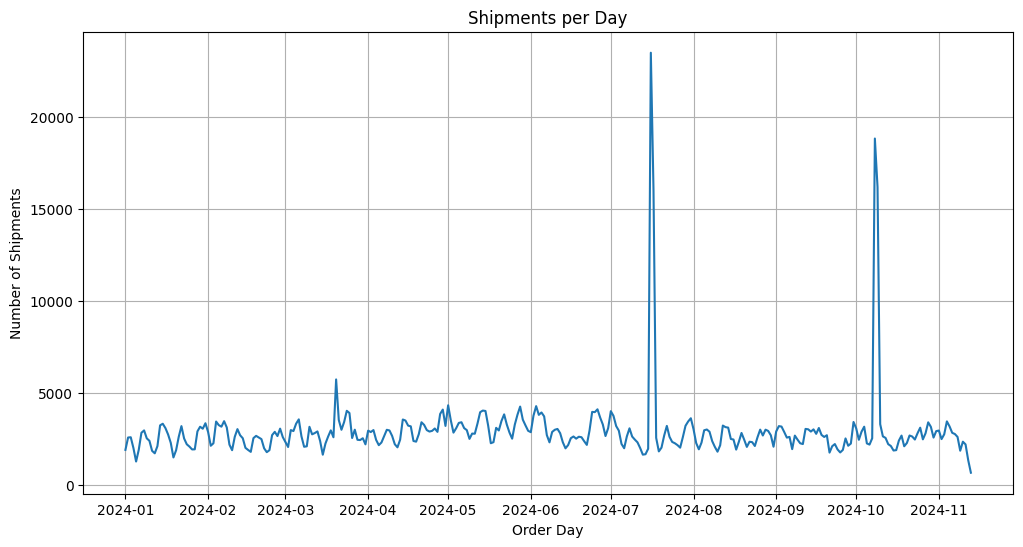

In [187]:
# plot a linechart of shipments per day from order_day
import matplotlib.pyplot as plt
shipments_per_day = df.groupby('order_day').size()
plt.figure(figsize=(12,6))
plt.plot(shipments_per_day.index, shipments_per_day.values)
plt.title('Shipments per Day')
plt.xlabel('Order Day')
plt.ylabel('Number of Shipments')
plt.grid()
plt.show()

In [188]:
# Check duplicates in order_id
duplicate_orders = df[df.duplicated(subset=['order_id'], keep=False)]
print(f"Number of duplicate order_ids: {duplicate_orders['order_id'].nunique()}")

Number of duplicate order_ids: 31404


***
# Creating the new columns

In [189]:
df["c2p_minus_c2d"] = df["c2p"] - df["c2d"]
df["c2d_minus_c2p"] = df["c2d"] - df["c2p"]

In [190]:
df["order_to_delivery_days"] = (
    (df["actual_delivery_day"] - df["order_day"]).dt.days.abs()
)

In [191]:
df["order_to_external_pdd_days"] = (
    (df["external_pdd"] - df["order_day"]).dt.days.abs()
)

In [192]:
df.head()

,fulfillment_shipment_id,shipments,packages,order_id,carrier,warehouse_type,network_type,origin_node,dest_postal_code,country,...,scan_X42,number_of_contacts,contact_cs_bucket,concession_bucket_l1,c2d,c2p,c2p_minus_c2d,c2d_minus_c2p,order_to_delivery_days,order_to_external_pdd_days
9,2.340510e+14,1,1,9659318-4574756,SEMRE,DF,Out of network,XADFB-A,7463,AT,...,N,0.0,No contact,No concession,NaN,NaN,NaN,NaN,182,12
172,2.341310e+14,1,1,1737896-6617967,IAK,DF,Out of network,XELKS-A,28357,DE,...,Y,0.0,No contact,No concession,NaN,NaN,NaN,NaN,12,192
208,2.341460e+14,1,2,2052380-3366702,IAK,DF,Out of network,XFBAY-A,97440,DE,...,N,0.0,No contact,No concession,NaN,NaN,NaN,NaN,69,192
374,2.342210e+14,1,1,8857659-5960358,SEMRE,VF,Out of network,XVENC-A,6020,AT,...,N,1.0,WMS,No concession,NaN,NaN,NaN,NaN,11,150
487,2.342610e+14,1,1,2677325-8521941,SEMRE,IN,In network,XXDEV-A,45663,DE,...,N,0.0,No contact,No concession,NaN,NaN,NaN,NaN,4,192


In [193]:
# as percentage
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
fulfillment_shipment_id       0.000000
shipments                     0.000000
packages                      0.000000
order_id                      0.000000
carrier                       0.000000
warehouse_type                0.000000
network_type                  0.000000
origin_node                   0.000000
dest_postal_code              1.391262
country                       0.000000
sd_flag                       0.000000
order_day                     0.000000
ship_day                      0.000000
slam_date                     0.000000
dea_miss_type                 0.000000
dea_success                   0.000000
actual_delivery_day           0.000000
external_ead                  0.000000
internal_ead                  0.890464
dea_week (pdd week)           0.000000
external_pdd                  0.000000
internal_pdd                  0.000000
last_pdd_made                 0.000000
clockstop                     2.719776
volume_type        

In [ ]:
# Save the cleaned dataframe to a new CSV file
df.to_csv("cleaned_logistics_data.csv", index=False)